In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_csv('yelp.csv')

In [3]:
data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


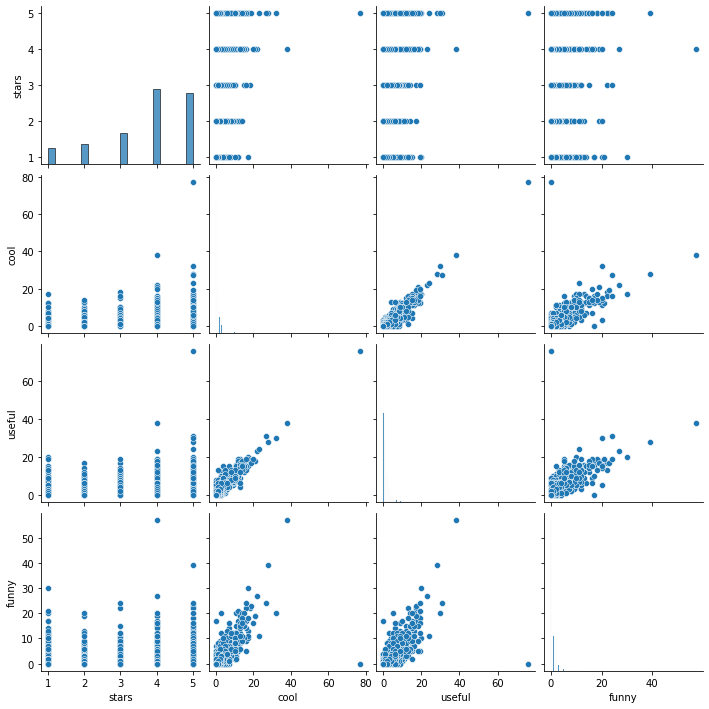

In [6]:
sns.pairplot(data)

In [7]:
data['type'].unique()

array(['review'], dtype=object)

In [8]:
data.drop('type', axis = 1, inplace = True)

In [9]:
data['len text'] = data['text'].apply(len)

<AxesSubplot:>

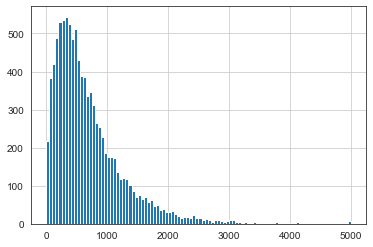

In [10]:
sns.set_style('white')
data['len text'].hist(bins = 100)

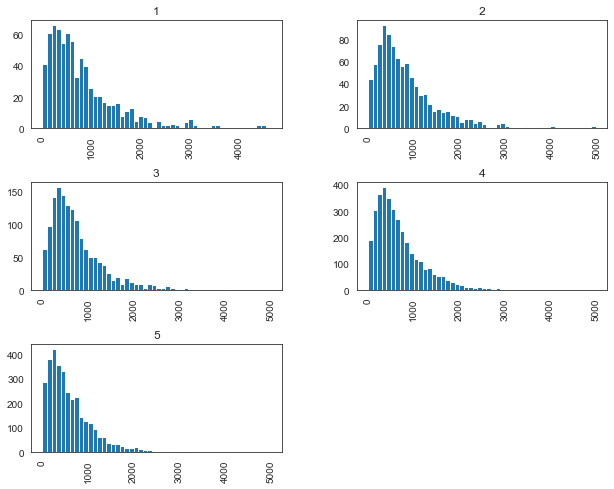

In [11]:
data.hist(column = 'len text', by = 'stars', figsize=(10,8), bins = 50)
plt.show()

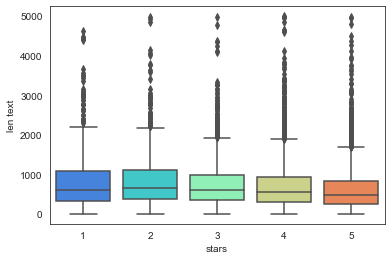

In [12]:
sns.boxplot(x = 'stars', y = 'len text', data = data, palette='rainbow')
plt.show()

<AxesSubplot:xlabel='stars', ylabel='count'>

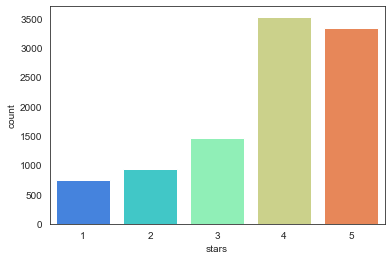

In [13]:
sns.countplot(data['stars'], palette='rainbow')

In [14]:
data.groupby('stars').mean()

,cool,useful,funny,len text
stars,,,,
1,0.576769,1.604806,1.056075,826.515354
2,0.719525,1.563107,0.875944,842.256742
3,0.788501,1.306639,0.694730,758.498289
4,0.954623,1.395916,0.670448,712.923142
5,0.944261,1.381780,0.608631,624.999101


In [15]:
data.groupby('stars').mean().corr()

,cool,useful,funny,len text
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
len text,-0.857664,0.699881,0.843461,1.000000


<AxesSubplot:>

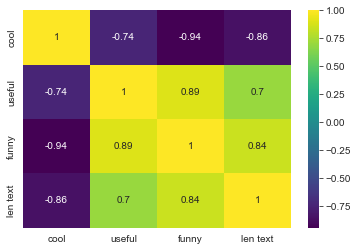

In [16]:
sns.heatmap(data.groupby('stars').mean().corr(), annot = True, cmap = 'viridis')

In [17]:
df = data[(data['stars'] == 1) | (data['stars'] == 5)]

In [18]:
df['stars'].value_counts()

5    3337
1     749
Name: stars, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  4086 non-null   object
 1   date         4086 non-null   object
 2   review_id    4086 non-null   object
 3   stars        4086 non-null   int64 
 4   text         4086 non-null   object
 5   user_id      4086 non-null   object
 6   cool         4086 non-null   int64 
 7   useful       4086 non-null   int64 
 8   funny        4086 non-null   int64 
 9   len text     4086 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 351.1+ KB


In [20]:
X = df['text']
y = df['stars']

In [21]:
cv = CountVectorizer()

In [22]:
X = cv.fit_transform(X)

In [23]:
print(X.shape)

(4086, 19183)


In [24]:
nb = MultinomialNB()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [26]:
nb.fit(X_train, y_train)

MultinomialNB()

In [27]:
pred = nb.predict(X_test)

In [28]:
print(confusion_matrix(y_test, pred))
print("\n")
print(classification_report(y_test, pred))

[[113  50]
 [ 24 631]]


              precision    recall  f1-score   support

           1       0.82      0.69      0.75       163
           5       0.93      0.96      0.94       655

    accuracy                           0.91       818
   macro avg       0.88      0.83      0.85       818
weighted avg       0.91      0.91      0.91       818



In [29]:
tv = TfidfTransformer()

In [30]:
pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('NB', MultinomialNB())
])     

In [31]:
one = df[df['stars'] == 1]
five = df[df['stars'] == 5].sample(749)

In [32]:
five['len text'].describe()

count     749.000000
mean      621.891856
std       551.824693
min         6.000000
25%       253.000000
50%       481.000000
75%       829.000000
max      4960.000000
Name: len text, dtype: float64

In [33]:
yelp = pd.concat([one, five])
X = yelp['text']
y = yelp['stars']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [35]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('NB', MultinomialNB())])

In [36]:
predictions = pipe.predict(X_test)
print(confusion_matrix(y_test, predictions))
print("\n")
print(classification_report(y_test, predictions))

[[146   8]
 [ 25 121]]


              precision    recall  f1-score   support

           1       0.85      0.95      0.90       154
           5       0.94      0.83      0.88       146

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

